In [2]:
#I will write a function, that takes in an aminoacid sequence and the positions where this sequence is to sliced. By this, further domain comparisons are made possible
import pandas as pd
import data_cleanup as dc
import domain_comparison as doc
import data_exploration as de
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

/Users/frido/anaconda3/envs/topic02_team02/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:
fpath = '../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv'
df = dc.norm(pd.read_csv(fpath))


In [4]:
DNA_domain2 = doc.slice_domain(df, start=102, end=292)
DNA_domain2

,mutant,mutated_sequence,DMS_score,DMS_score_bin,position_mut,AS_old,AS_new
1919,T102Q,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.516971,1.0,102,T,Q
1920,T102P,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.344032,1.0,102,T,P
1921,T102R,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.224089,1.0,102,T,R
1922,T102Y,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.365929,1.0,102,T,Y
1923,T102V,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.252546,1.0,102,T,V
...,...,...,...,...,...,...,...
5543,K292F,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.494292,1.0,292,K,F
5544,K292E,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.211302,1.0,292,K,E
5545,K292N,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.305758,1.0,292,K,N
5546,K292A,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,0.420282,1.0,292,K,A


In [5]:
# Saving the different domains for better accessibility

#Transactivation Domain 1
t1_start = 1
t1_end = 43

#Transactivation Domain 2
t2_start = 44
t2_end = 63

#Proline-rich Region
pr_start = 64
pr_end = 92

#DNA Binding Domain
dna_start = 102
dna_end = 292

#Tetramerization Domain
tetra_start = 320
tetra_end = 355

#Regulatory Domain
reg_start = 356
reg_end = 393



t1_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t1_start, end= t1_end)))
t1_list = doc.slice_domain(df, start= t1_start, end= t1_end)

t2_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= t2_start, end= t2_end)))
t2_list = doc.slice_domain(df, start= t2_start, end= t2_end)

pr_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= pr_start, end= pr_end)))
pr_list = doc.slice_domain(df, start= pr_start, end= pr_end)

dna_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= dna_start, end= dna_end)))
dna_list = doc.slice_domain(df, start= dna_start, end= dna_end)

tetra_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= tetra_start, end= tetra_end)))
tetra_list = doc.slice_domain(df, start= tetra_start, end= tetra_end)

reg_domain = dc.rmv_na(dc.df_transform(doc.slice_domain(df, start= reg_start, end= reg_end)))
reg_list = doc.slice_domain(df, start= reg_start, end= reg_end)


## Mean values

In [6]:
t1_mean = t1_domain.mean().rename('mean')
t1_mean.to_csv('./t1_mean.csv')

t2_mean = t2_domain.mean().rename('mean')
t2_mean.to_csv('./t2_mean.csv')

pr_mean = pr_domain.mean().rename('mean')
pr_mean.to_csv('./pr_mean.csv')

dna_mean = dna_domain.mean().rename('mean')
dna_mean.to_csv('./dna_mean.csv')

tetra_mean = tetra_domain.mean().rename('mean')
tetra_mean.to_csv('./tetra_mean.csv')

reg_mean = reg_domain.mean().rename('mean')
reg_mean.to_csv('./reg_mean.csv')


## Distribution and Heatmaps
### Transactivation Domain 1

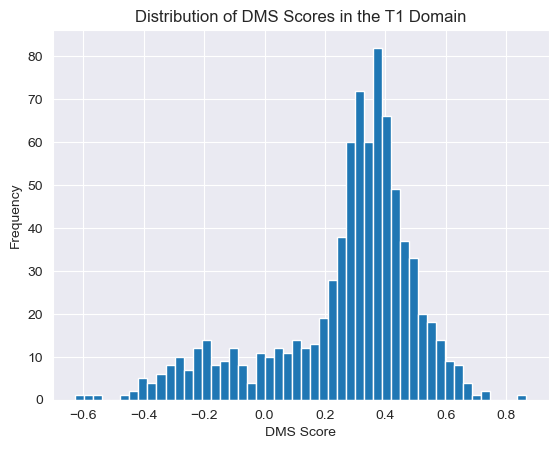

0.26650347707819083
0.32786426912698863


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

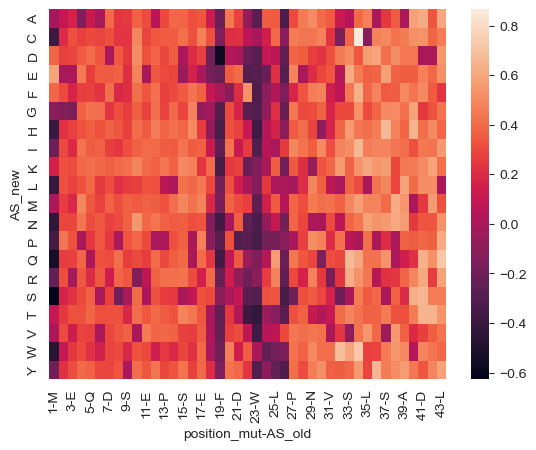

In [7]:

dms_scores_t1 = t1_list['DMS_score']

plt.hist(dms_scores_t1, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T1 Domain')
plt.show()

print(dms_scores_t1.mean())
print(dms_scores_t1.median())
sns.heatmap(t1_domain)

### Transactivation Domain 2

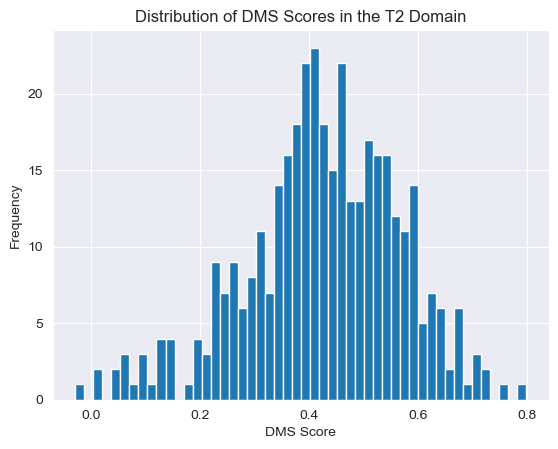

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

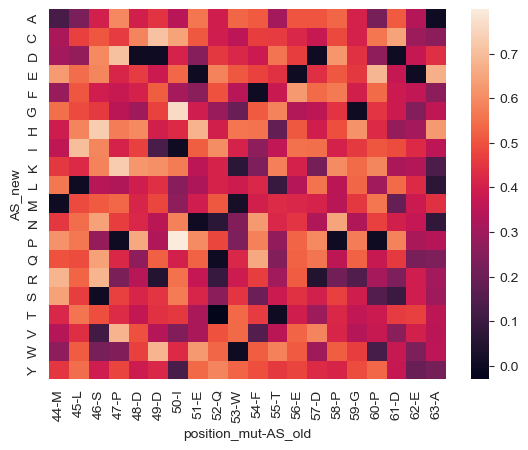

In [8]:

dms_scores_t2 = t2_list['DMS_score']

plt.hist(dms_scores_t2, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the T2 Domain')
plt.show()

sns.heatmap(t2_domain)

### Proline-rich Region

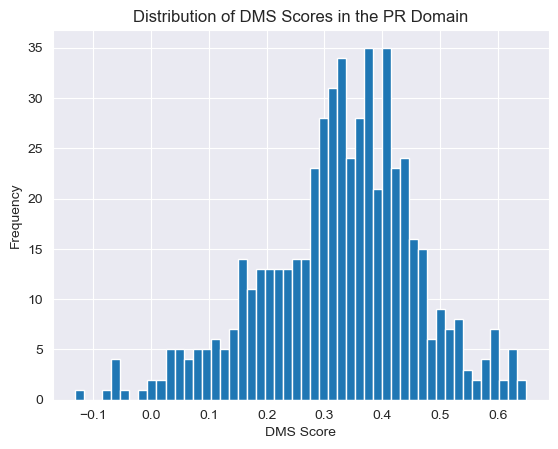

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

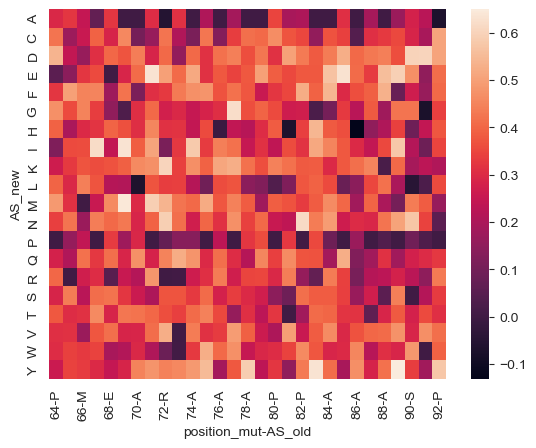

In [9]:
dms_scores_pr = pr_list['DMS_score']

plt.hist(dms_scores_pr, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the PR Domain')
plt.show()

sns.heatmap(pr_domain)

### DNA Binding Domain

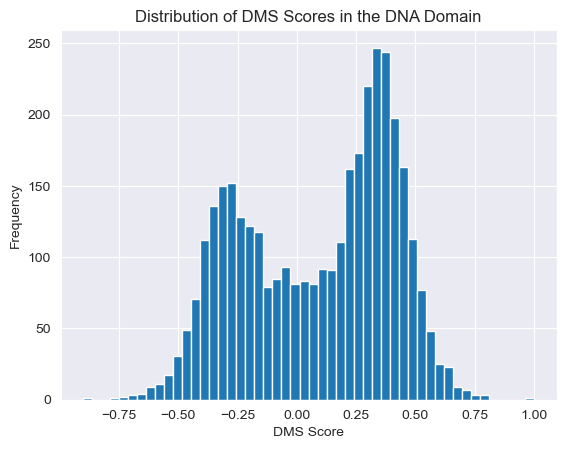

0.08858827048879357
0.17019647497844592


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

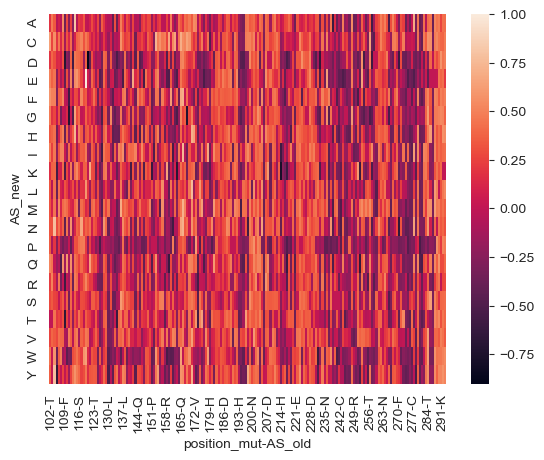

In [11]:

dms_scores_dna = dna_list['DMS_score']

plt.hist(dms_scores_dna, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the DNA Domain')
plt.show()

print(dms_scores_dna.mean())
print(dms_scores_dna.median())


sns.heatmap(dna_domain)

### Tetramerization Domain

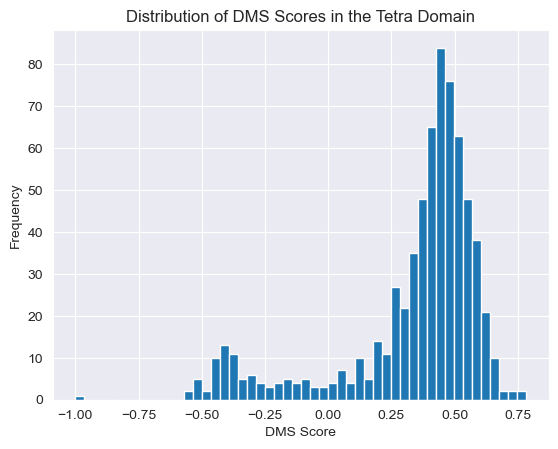

0.33612202499660165
0.42857185365160366


<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

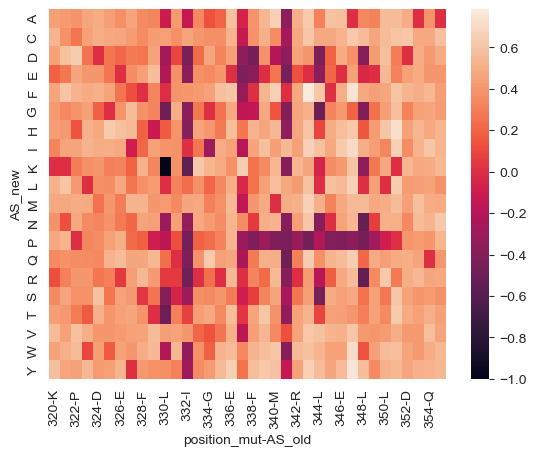

In [26]:

dms_scores_tetra = tetra_list['DMS_score']

plt.hist(dms_scores_tetra, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Tetra Domain')
plt.show()

print(dms_scores_tetra.mean())
print(dms_scores_tetra.median())

sns.heatmap(tetra_domain)

### Regulatory Domain

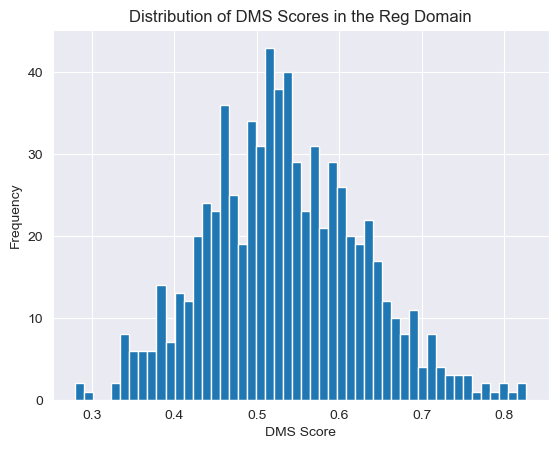

<Axes: xlabel='position_mut-AS_old', ylabel='AS_new'>

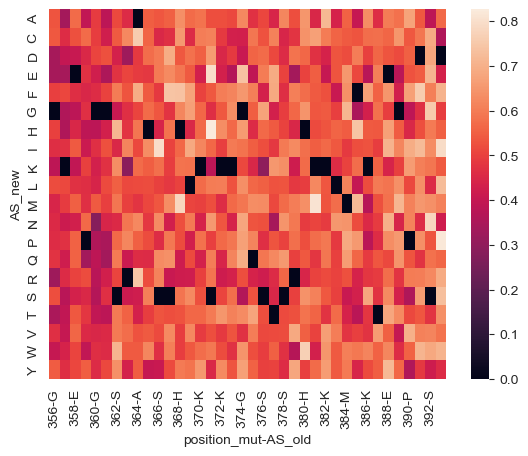

In [28]:

dms_scores_reg = reg_list['DMS_score']

plt.hist(dms_scores_reg, bins=100)
plt.xlabel('DMS Score')
plt.ylabel('Frequency')
plt.title('Distribution of DMS Scores in the Reg Domain')
plt.show()

sns.heatmap(reg_domain)

## Standard deviation


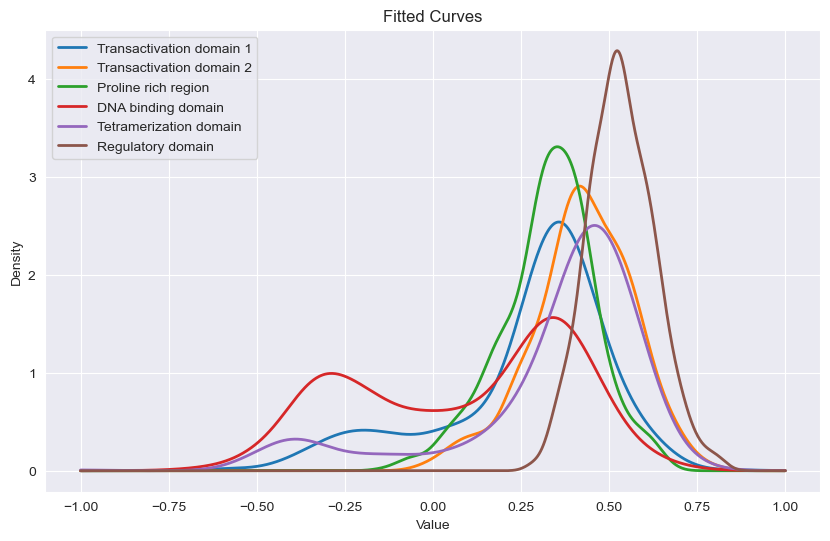

In [48]:

t1_std = t1_mean.std()
t2_std = t2_mean.std()
pr_std = pr_mean.std()
dna_std = dna_mean.std()
tetra_std = tetra_mean.std()
reg_std = reg_mean.std()

std_combined = pd.DataFrame({
    't1_std': [t1_std],
    't2_std': [t2_std],
    'pr_std': [pr_std],
    'dna_std': [dna_std],
    'tetra_std': [tetra_std],
    'reg_std': [reg_std]
})

std_combined

## Mean value matrix

<Axes: xlabel='AS_new', ylabel='AS_old'>

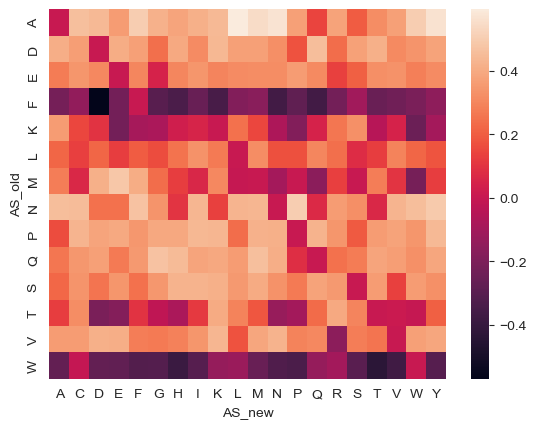

In [14]:
import seaborn as sns
sns.heatmap(dc.rmv_na(de.mean_substitutions(t1_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

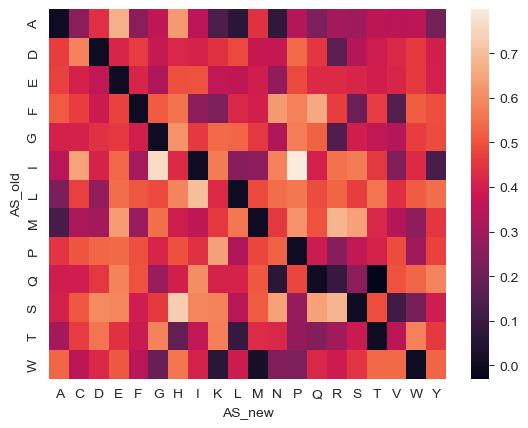

In [15]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(t2_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

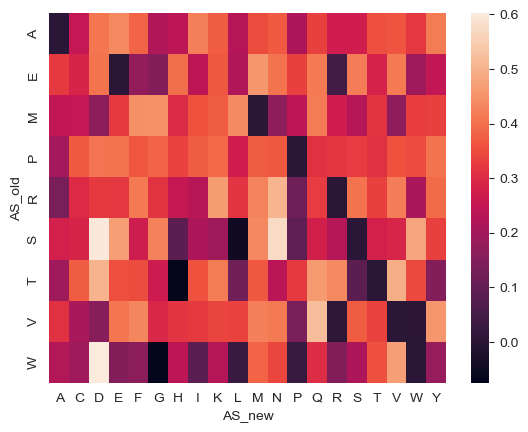

In [16]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(pr_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

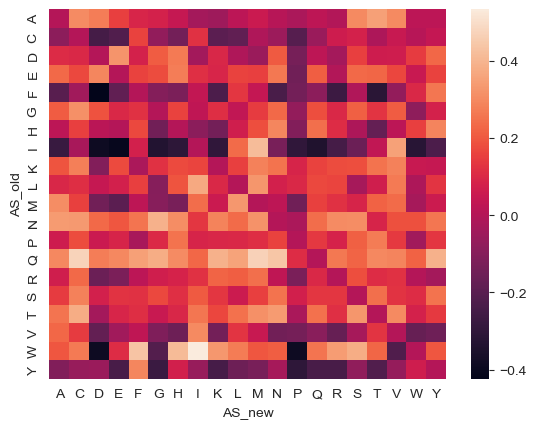

In [17]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(dna_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

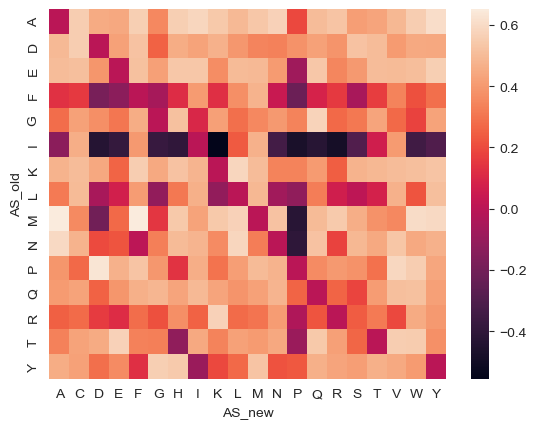

In [18]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(tetra_list)))

<Axes: xlabel='AS_new', ylabel='AS_old'>

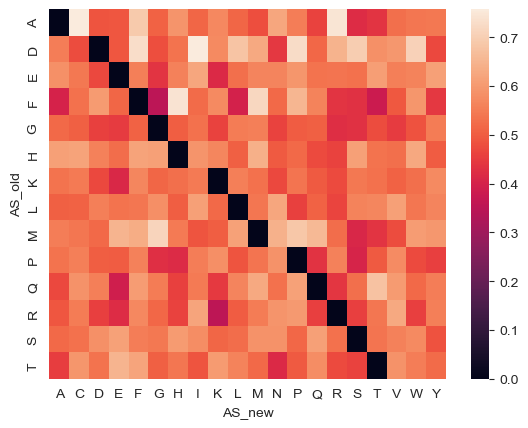

In [19]:

sns.heatmap(dc.rmv_na(de.mean_substitutions(reg_list)))

## Shapiro Wilk test

In [20]:

print('T1 Domain')
print(doc.test_normality(t1_list['DMS_score']))

print('T2 Domain')
print(doc.test_normality(t2_list['DMS_score']))

print('PR Domain')
print(doc.test_normality(pr_list['DMS_score']))

print('DNA Domain')
print(doc.test_normality(dna_list['DMS_score']))

print('Tetra Domain')
print(doc.test_normality(tetra_list['DMS_score']))

print('Reg Domain')
print(doc.test_normality(reg_list['DMS_score']))

T1 Domain
{'statistic': 0.9002784490585327, 'p-value': 1.254350054907654e-22, 'is_normal': False}
T2 Domain
{'statistic': 0.9873475432395935, 'p-value': 0.0021625300869345665, 'is_normal': False}
PR Domain
{'statistic': 0.9840318560600281, 'p-value': 9.763499292603228e-06, 'is_normal': False}
DNA Domain
{'statistic': 0.9479204416275024, 'p-value': 4.718246061433538e-34, 'is_normal': False}
Tetra Domain
{'statistic': 0.7925643920898438, 'p-value': 1.2606454914534804e-28, 'is_normal': False}
Reg Domain
{'statistic': 0.9961809515953064, 'p-value': 0.07724665105342865, 'is_normal': True}
